# Import packages

In [33]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from sklearn import linear_model
from scipy.stats import pearsonr, spearmanr
import math

# Import dataset

In [7]:
df = pd.read_csv("merged_data.csv")
df

,Entity,Chocolate consumption,Rank,Nobel laureates,Population,Nobel laureates per capita
0,Egypt,0.198716,54,4,99375741,403
1,Canada,2.250461,22,25,36953765,6765
2,Croatia,2.354730,28,2,3888529,5143
3,Denmark,3.188621,9,13,5754356,22592
4,Mexico,0.331265,64,3,130759074,229
...,...,...,...,...,...,...
68,Lithuania,0.127321,33,1,2876475,3476
69,Iran,0.423560,63,2,82011735,244
70,Germany,2.025594,14,109,82293457,13245
71,Costa Rica,1.068642,38,1,4953199,2019


# Plot the Nobel Laureates ratio ($\times 1e10$)

<Axes: ylabel='Entity'>

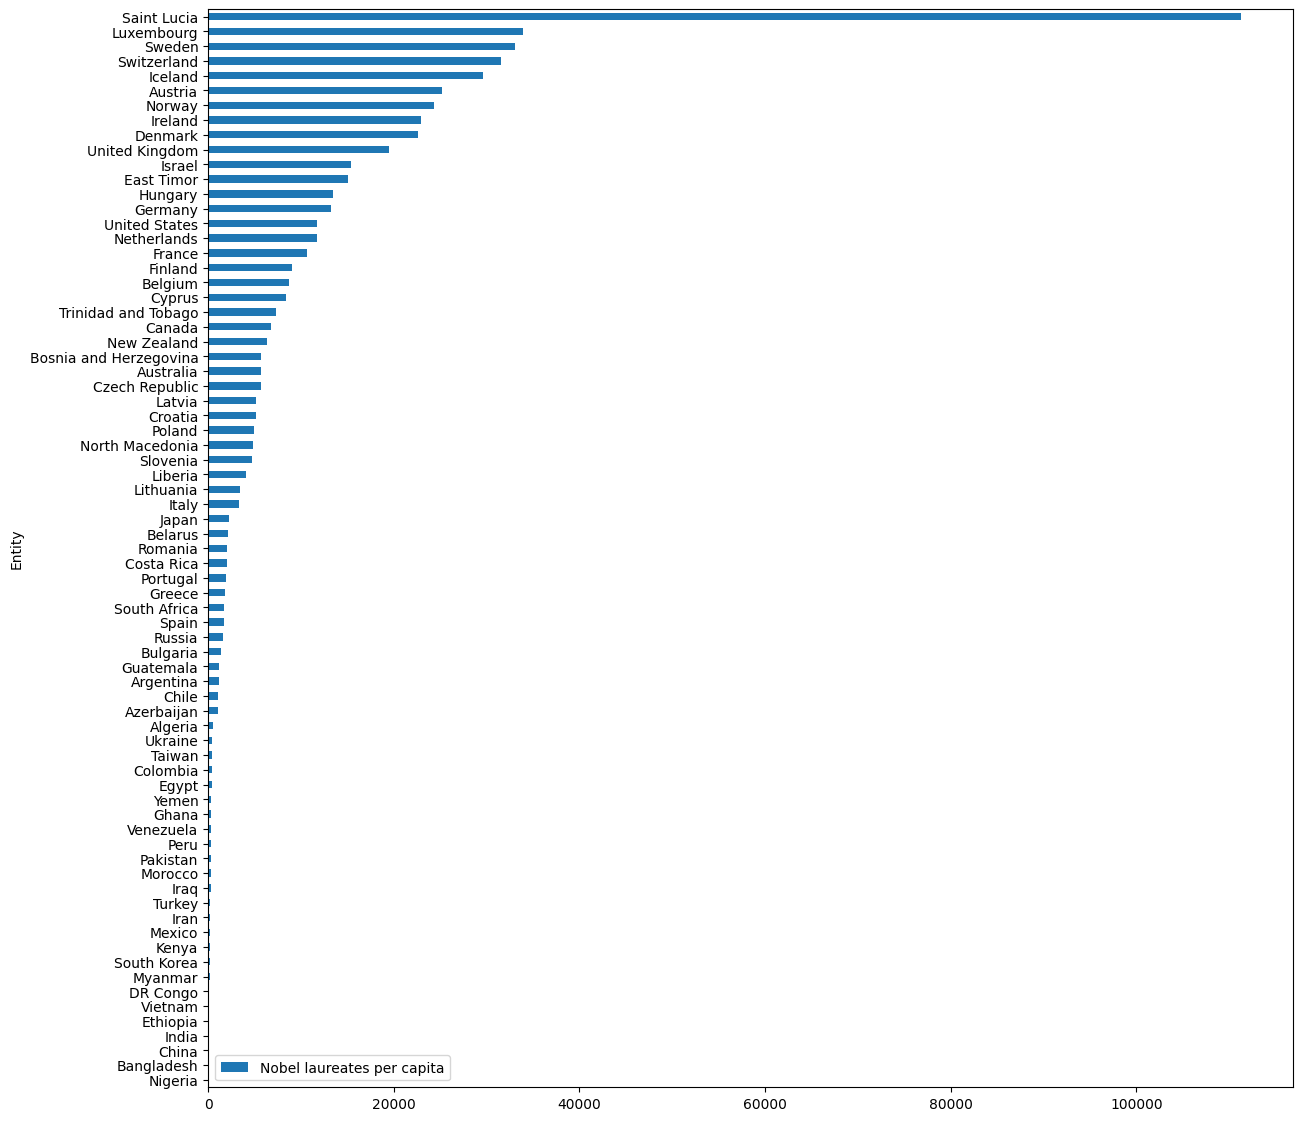

In [6]:
df.sort_values(
    by="Nobel laureates per capita",
    ascending=True
).plot(
    x="Entity",
    y="Nobel laureates per capita",
    kind="barh",
    figsize=(14,14))

# Plot chocolate consumption

<Axes: ylabel='Entity'>

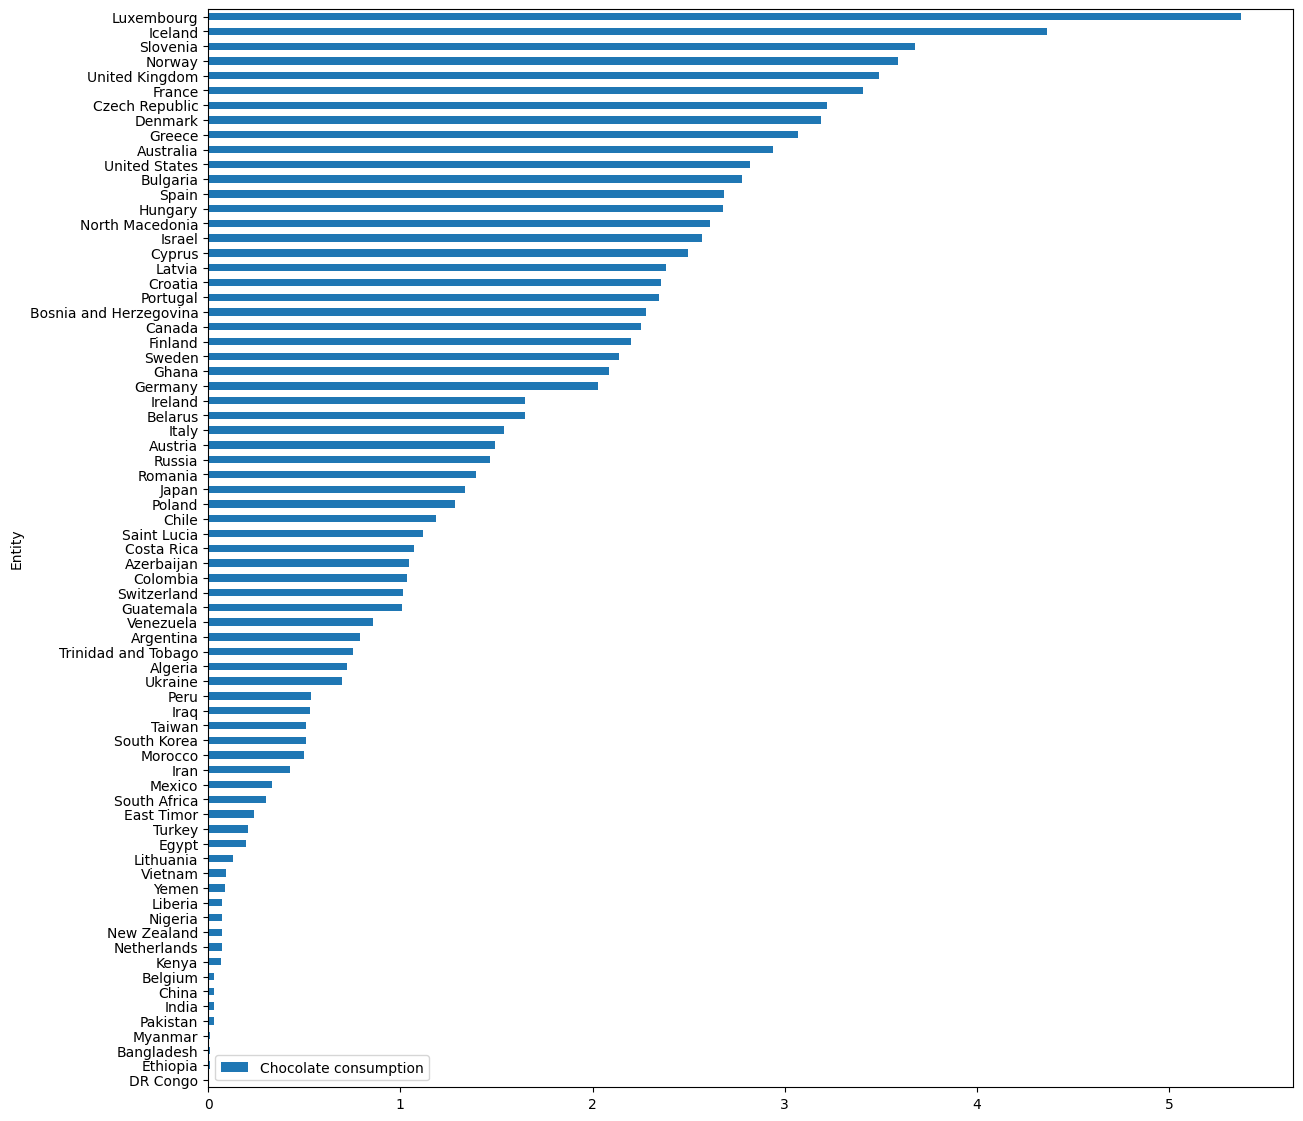

In [8]:
df.sort_values(
    by="Chocolate consumption",
    ascending=True
).plot(
    x="Entity",
    y="Chocolate consumption",
    kind="barh",
    figsize=(14,14))

# Plot `Nobel laureates per capita` against `Chocolate consumption`

<Axes: xlabel='Chocolate consumption', ylabel='Nobel laureates per capita'>

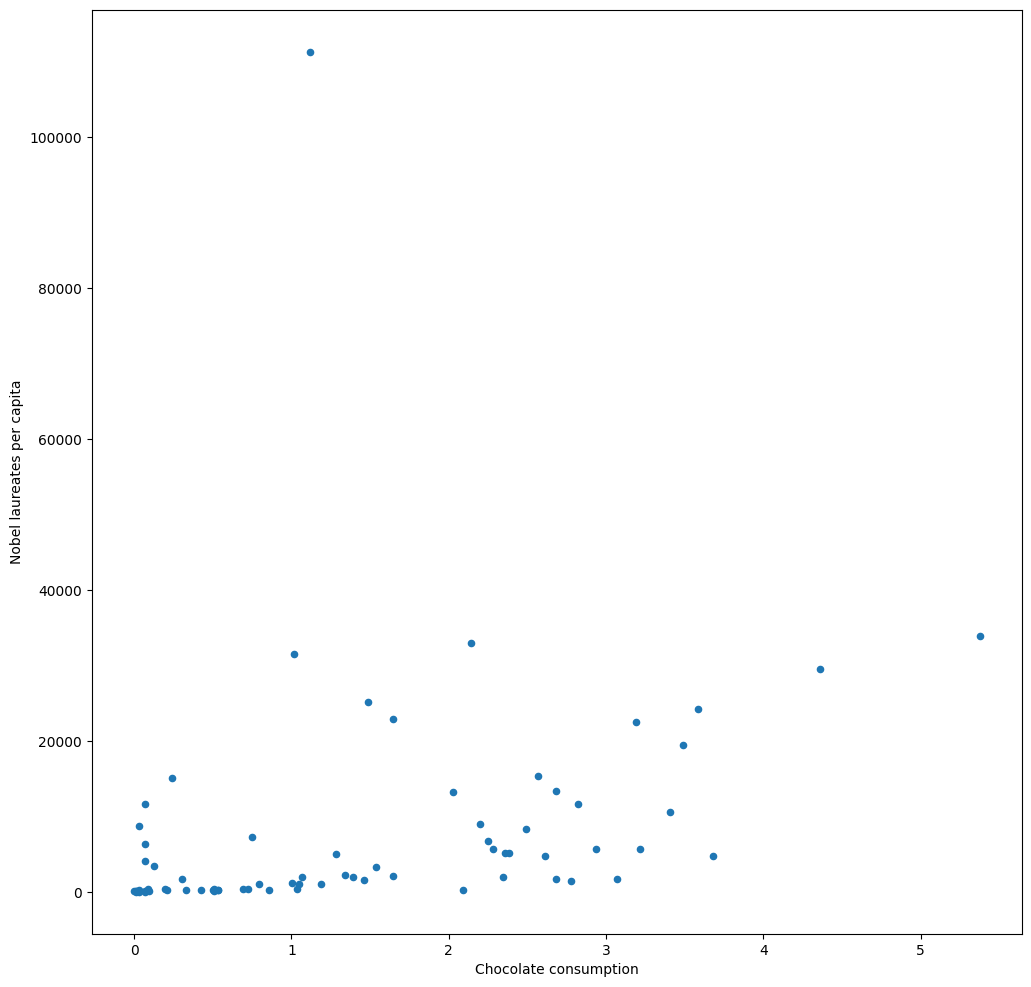

In [10]:
df.plot(
    x="Chocolate consumption",
    y="Nobel laureates per capita",
    kind="scatter",
    figsize=(12,12))

# Fitting a line to the data

Text(0, 0.5, 'Nobel laureates per capita ($ \\times 1e10 $)')

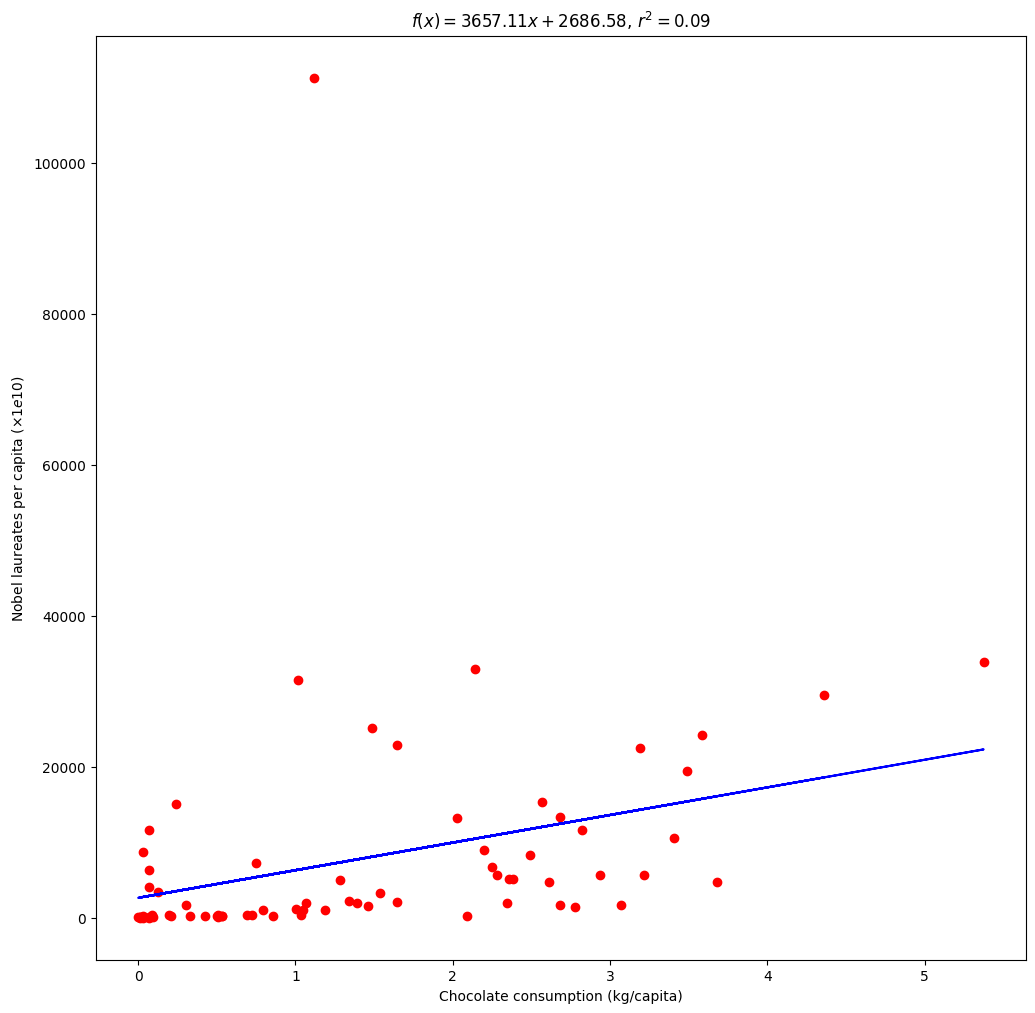

In [41]:
x, y = df[["Chocolate consumption"]], df[["Nobel laureates per capita"]]

linear_regression = linear_model.LinearRegression()
linear_regression.fit(x, y)

a = linear_regression.coef_.squeeze()
b = linear_regression.intercept_.squeeze()

r_squared = linear_regression.score(x, y)

fig = figure(num=None, figsize=(12, 12))

plt.scatter(x, y, color = 'red')
plt.plot(x, linear_regression.predict(x), color = 'blue')

plt.title(f"$f(x)={np.round(a, 2)} x + {np.round(b, 2)}$, $r^2={round(r_squared,2)}$")
plt.xlabel("Chocolate consumption (kg/capita)")
plt.ylabel("Nobel laureates per capita ($ \\times 1e10 $)")

# Pearson correlation

In [17]:
df[["Chocolate consumption", "Nobel laureates per capita"]].corr(method="pearson")

,Chocolate consumption,Nobel laureates per capita
Chocolate consumption,1.000000,0.306176
Nobel laureates per capita,0.306176,1.000000


In [21]:
p_result = pearsonr(df["Chocolate consumption"], df["Nobel laureates per capita"])
p_result

PearsonRResult(statistic=0.3061756857137139, pvalue=0.008428432914088943)

In [22]:
p_ci = p_result.confidence_interval(confidence_level=0.95)
p_ci

ConfidenceInterval(low=0.08187582405838811, high=0.500955176082413)

# Spearman correlation

In [23]:
spearman_r = df[["Chocolate consumption", "Nobel laureates per capita"]].corr(method="spearman")

,Chocolate consumption,Nobel laureates per capita
Chocolate consumption,1.00000,0.65393
Nobel laureates per capita,0.65393,1.00000


In [10]:
p_result = spearmanr(df["Chocolate consumption"], df["Nobel laureates per capita"])

spearman_r = p_result.statistic
p_result

SignificanceResult(statistic=0.653929516321411, pvalue=3.5424961294278944e-10)

From https://stats.stackexchange.com/questions/18887/how-to-calculate-a-confidence-interval-for-spearmans-rank-correlation

The Fisher transformation is atanh. On the transformed scale, the sampling distribution of the estimate is approximately normal, so a 95% CI is found by taking the transformed estimate and adding and subtracting 1.96 times its standard error.

The standard error is (approximately) $1 \over \sqrt{n - 3}$

A 95% confidence interval of Spearman correlation is given by:

$$
\tanh{ \left( \text{atanh}(r) \pm 1.96 / \sqrt{n - 3}) \right) }
$$

where:
* $ r $ is the estimate of the correlation
* $ n $ is the sample size.


In [12]:
num = len(df)
stderr = 1.0 / math.sqrt(num - 3)
delta = 1.96 * stderr

lower = math.tanh(math.atanh(spearman_r) - delta)
upper = math.tanh(math.atanh(spearman_r) + delta)

print("lower %.6f upper %.6f" % (lower, upper))

lower 0.498921 upper 0.768395
